In [2]:
import pandas as pd
import numpy as np

In [3]:
### Problem definition - Predicting whether the patient has heart disease

In [4]:
target="Is healthy"

In [5]:
data=pd.read_csv("/Users/brianshimmer/Desktop/Data science training/Data science training/Data science training/Heart disease dataset/heart disease.csv")

In [6]:
data

,Age,Sex,chest pain type,Trestbps,cholesteral,fasting blood sugar< 120,resting ecg,max heart rate,exercise induced angina,oldpeak,slope,Number of vessels colored,Thal,Is healthy,Type
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,male,notang,124.0,255.0,true,norm,175.0,fal,0.0,up,2.0,norm,buff,H
299,57.0,male,asympt,132.0,207.0,fal,norm,168.0,true,0.0,up,0.0,rev,buff,H
300,49.0,male,notang,118.0,149.0,fal,hyp,126.0,fal,0.8,up,3.0,norm,sick,S1
301,74.0,fem,abnang,120.0,269.0,fal,hyp,121.0,true,0.2,up,1.0,norm,buff,H


### Basic exploration

In [8]:
data.shape

(303, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        303 non-null    float64
 1   Sex                        303 non-null    object 
 2   chest pain type            303 non-null    object 
 3   Trestbps                   303 non-null    float64
 4   cholesteral                303 non-null    float64
 5   fasting blood sugar< 120   303 non-null    object 
 6   resting ecg                303 non-null    object 
 7   max heart rate             303 non-null    float64
 8   exercise induced angina    303 non-null    object 
 9   oldpeak                    303 non-null    float64
 10  slope                      303 non-null    object 
 11  Number of vessels colored  303 non-null    object 
 12  Thal                       303 non-null    object 
 13  Is healthy                 303 non-null    object 

In [10]:
data.describe()

,Age,Trestbps,cholesteral,max heart rate,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [11]:
# checking missing values

data.isnull().sum()

Age                          0
Sex                          0
chest pain type              0
Trestbps                     0
cholesteral                  0
fasting blood sugar< 120     0
resting ecg                  0
max heart rate               0
exercise induced angina      0
oldpeak                      0
slope                        0
Number of vessels colored    0
Thal                         0
Is healthy                   0
Type                         0
dtype: int64

In [12]:
(data=="?").sum()

Age                          0
Sex                          0
chest pain type              0
Trestbps                     0
cholesteral                  0
fasting blood sugar< 120     0
resting ecg                  0
max heart rate               0
exercise induced angina      0
oldpeak                      0
slope                        0
Number of vessels colored    0
Thal                         0
Is healthy                   0
Type                         0
dtype: int64

In [13]:
(data=="").sum()

Age                          0
Sex                          0
chest pain type              0
Trestbps                     0
cholesteral                  0
fasting blood sugar< 120     0
resting ecg                  0
max heart rate               0
exercise induced angina      0
oldpeak                      0
slope                        0
Number of vessels colored    0
Thal                         0
Is healthy                   0
Type                         0
dtype: int64

In [14]:
# Target variable distribution

target_count=data[target].value_counts()

Text(0.5, 0, 'Target')

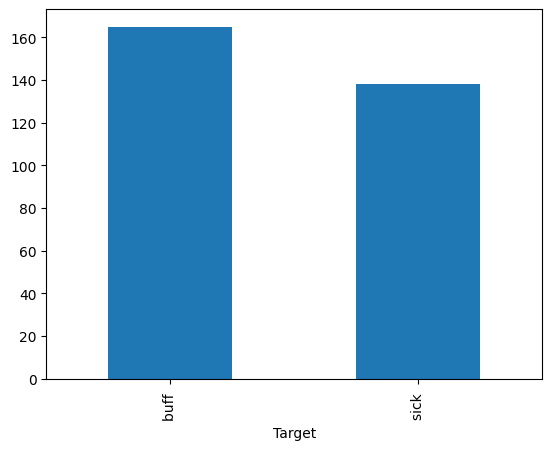

In [15]:
import matplotlib.pyplot as plt

target_count.plot(kind="bar")
plt.xlabel("Target")

### Data preprocessing

In [17]:
# Dropping irrelevant columns

#dropping type features because of its high correlation to is healthy column

data.drop("Type",axis=1, inplace=True)

In [18]:
#Converting categorical variables with binary division into binary features
num_cols=data.select_dtypes(include=["float64"]).columns
cat_cols=data.select_dtypes(include=["object"]).columns

binary_features=[col for col in cat_cols
                 if data[col].nunique()==2]
print(binary_features)

['Sex ', 'fasting blood sugar< 120', 'exercise induced angina', 'Is healthy']


In [19]:
data[binary_features]=data[binary_features].apply(
    lambda x:x.map({x.unique()[0]:0, x.unique()[1]:1}))

In [20]:
data

,Age,Sex,chest pain type,Trestbps,cholesteral,fasting blood sugar< 120,resting ecg,max heart rate,exercise induced angina,oldpeak,slope,Number of vessels colored,Thal,Is healthy
0,63.0,0,angina,145.0,233.0,0,hyp,150.0,0,2.3,down,0.0,fix,0
1,67.0,0,asympt,160.0,286.0,1,hyp,108.0,1,1.5,flat,3.0,norm,1
2,67.0,0,asympt,120.0,229.0,1,hyp,129.0,1,2.6,flat,2.0,rev,1
3,37.0,0,notang,130.0,250.0,1,norm,187.0,0,3.5,down,0.0,norm,0
4,41.0,1,abnang,130.0,204.0,1,hyp,172.0,0,1.4,up,0.0,norm,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,0,notang,124.0,255.0,0,norm,175.0,0,0.0,up,2.0,norm,0
299,57.0,0,asympt,132.0,207.0,1,norm,168.0,1,0.0,up,0.0,rev,0
300,49.0,0,notang,118.0,149.0,1,hyp,126.0,0,0.8,up,3.0,norm,1
301,74.0,1,abnang,120.0,269.0,1,hyp,121.0,1,0.2,up,1.0,norm,0


In [21]:
# Converting multi class categorical variables with one hot encoding

multi_class_features=list(
    set(cat_cols)-set(binary_features)
)

data=pd.get_dummies(data, columns=multi_class_features,drop_first=True)

In [22]:
data

,Age,Sex,Trestbps,cholesteral,fasting blood sugar< 120,max heart rate,exercise induced angina,oldpeak,Is healthy,resting ecg_ hyp,...,Thal_ fix,Thal_ rev,Thal_norm,Number of vessels colored_0.0,Number of vessels colored_1.0,Number of vessels colored_2.0,Number of vessels colored_3.0,chest pain type_angina,chest pain type_asympt,chest pain type_notang
0,63.0,0,145.0,233.0,0,150.0,0,2.3,0,True,...,True,False,False,True,False,False,False,True,False,False
1,67.0,0,160.0,286.0,1,108.0,1,1.5,1,True,...,False,False,True,False,False,False,True,False,True,False
2,67.0,0,120.0,229.0,1,129.0,1,2.6,1,True,...,False,True,False,False,False,True,False,False,True,False
3,37.0,0,130.0,250.0,1,187.0,0,3.5,0,False,...,False,False,True,True,False,False,False,False,False,True
4,41.0,1,130.0,204.0,1,172.0,0,1.4,0,True,...,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,0,124.0,255.0,0,175.0,0,0.0,0,False,...,False,False,True,False,False,True,False,False,False,True
299,57.0,0,132.0,207.0,1,168.0,1,0.0,0,False,...,False,True,False,True,False,False,False,False,True,False
300,49.0,0,118.0,149.0,1,126.0,0,0.8,1,True,...,False,False,True,False,False,False,True,False,False,True
301,74.0,1,120.0,269.0,1,121.0,1,0.2,0,True,...,False,False,True,False,True,False,False,False,False,False


In [23]:
#Removing duplicates

data.drop_duplicates()

,Age,Sex,Trestbps,cholesteral,fasting blood sugar< 120,max heart rate,exercise induced angina,oldpeak,Is healthy,resting ecg_ hyp,...,Thal_ fix,Thal_ rev,Thal_norm,Number of vessels colored_0.0,Number of vessels colored_1.0,Number of vessels colored_2.0,Number of vessels colored_3.0,chest pain type_angina,chest pain type_asympt,chest pain type_notang
0,63.0,0,145.0,233.0,0,150.0,0,2.3,0,True,...,True,False,False,True,False,False,False,True,False,False
1,67.0,0,160.0,286.0,1,108.0,1,1.5,1,True,...,False,False,True,False,False,False,True,False,True,False
2,67.0,0,120.0,229.0,1,129.0,1,2.6,1,True,...,False,True,False,False,False,True,False,False,True,False
3,37.0,0,130.0,250.0,1,187.0,0,3.5,0,False,...,False,False,True,True,False,False,False,False,False,True
4,41.0,1,130.0,204.0,1,172.0,0,1.4,0,True,...,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,0,124.0,255.0,0,175.0,0,0.0,0,False,...,False,False,True,False,False,True,False,False,False,True
299,57.0,0,132.0,207.0,1,168.0,1,0.0,0,False,...,False,True,False,True,False,False,False,False,True,False
300,49.0,0,118.0,149.0,1,126.0,0,0.8,1,True,...,False,False,True,False,False,False,True,False,False,True
301,74.0,1,120.0,269.0,1,121.0,1,0.2,0,True,...,False,False,True,False,True,False,False,False,False,False


In [24]:
#Checking correlation

data.corr()

,Age,Sex,Trestbps,cholesteral,fasting blood sugar< 120,max heart rate,exercise induced angina,oldpeak,Is healthy,resting ecg_ hyp,...,Thal_ fix,Thal_ rev,Thal_norm,Number of vessels colored_0.0,Number of vessels colored_1.0,Number of vessels colored_2.0,Number of vessels colored_3.0,chest pain type_angina,chest pain type_asympt,chest pain type_notang
Age,1.000000,0.098447,0.279351,0.213678,-0.121308,-0.398522,0.096801,0.210013,0.225439,0.141398,...,0.063758,0.110752,-0.135891,-0.350844,0.179284,0.226491,0.162243,0.047516,0.138253,-0.059432
Sex,0.098447,1.000000,0.056769,0.197912,0.045032,0.044020,-0.141664,-0.096093,-0.280937,-0.036539,...,-0.141135,-0.321559,0.376365,0.122854,-0.096673,0.020571,-0.066758,-0.088043,-0.089621,0.116588
Trestbps,0.279351,0.056769,1.000000,0.123174,-0.177531,-0.046698,0.067616,0.193216,0.144931,0.133249,...,0.076369,0.109573,-0.140712,-0.055011,-0.059485,0.088386,0.080109,0.151343,0.021447,-0.045107
cholesteral,0.213678,0.197912,0.123174,1.000000,-0.013294,-0.009940,0.067023,0.053952,0.085239,0.166565,...,-0.093560,0.059621,-0.004591,-0.080600,0.018775,0.059887,0.098568,-0.050589,0.070684,-0.037918
fasting blood sugar< 120,-0.121308,0.045032,-0.177531,-0.013294,1.000000,0.008567,-0.025665,-0.005747,-0.028046,-0.077405,...,-0.091351,-0.030953,0.086774,0.112548,0.014774,-0.122080,-0.075867,-0.055511,0.060190,-0.083679
max heart rate,-0.398522,0.044020,-0.046698,-0.009940,0.008567,1.000000,-0.378812,-0.344187,-0.421741,-0.073953,...,-0.159748,-0.215417,0.294801,0.273136,-0.195502,-0.056905,-0.175506,0.079082,-0.376561,0.165475
exercise induced angina,0.096801,-0.141664,0.067616,0.067023,-0.025665,-0.378812,1.000000,0.288223,0.436757,0.084059,...,0.063073,0.300223,-0.328539,-0.187734,0.150206,0.097399,0.013188,-0.093384,0.469061,-0.271028
oldpeak,0.210013,-0.096093,0.193216,0.053952,-0.005747,-0.344187,0.288223,1.000000,0.430696,0.100141,...,0.104635,0.302145,-0.339086,-0.204803,-0.011613,0.218319,0.189296,0.086959,0.280243,-0.132444
Is healthy,0.225439,-0.280937,0.144931,0.085239,-0.028046,-0.421741,0.436757,0.430696,1.000000,0.159775,...,0.106589,0.486112,-0.527334,-0.465590,0.232412,0.273998,0.210615,-0.086957,0.516015,-0.316742
resting ecg_ hyp,0.141398,-0.036539,0.133249,0.166565,-0.077405,-0.073953,0.084059,0.100141,0.159775,1.000000,...,0.035404,0.016787,-0.033630,-0.105628,0.055747,0.051131,0.087687,0.070850,0.114075,-0.090611


### EDA

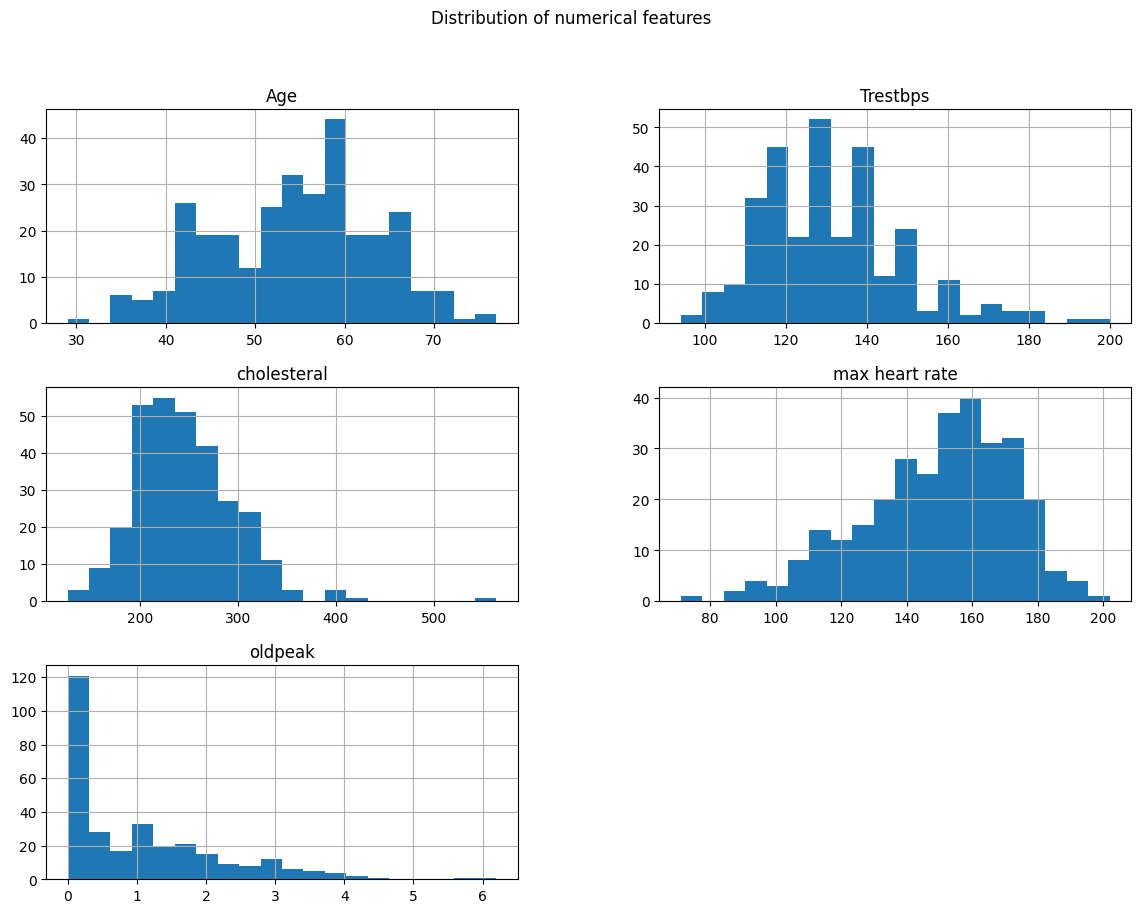

In [26]:
#Histogram for numerical features

data[num_cols].hist(figsize=(14, 10), bins=20)
plt.suptitle("Distribution of numerical features")
plt.show()

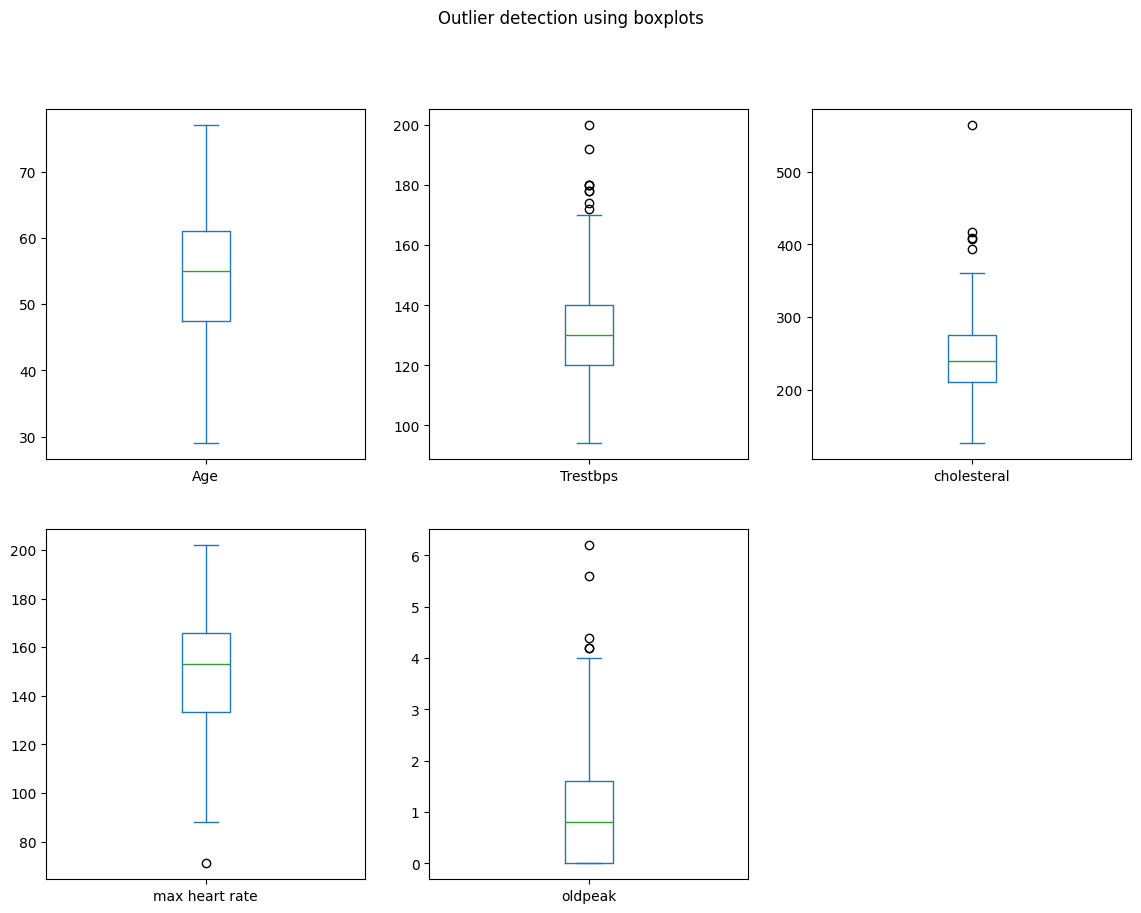

In [27]:
#Outlier detection using Boxplot

data[num_cols].plot(
    kind="box",
    subplots=True,
    layout=(len(num_cols)//3+1,3),
    figsize=(14, 10),
    sharex=False
)
plt.suptitle("Outlier detection using boxplots")
plt.show()

In [28]:
import seaborn as sns

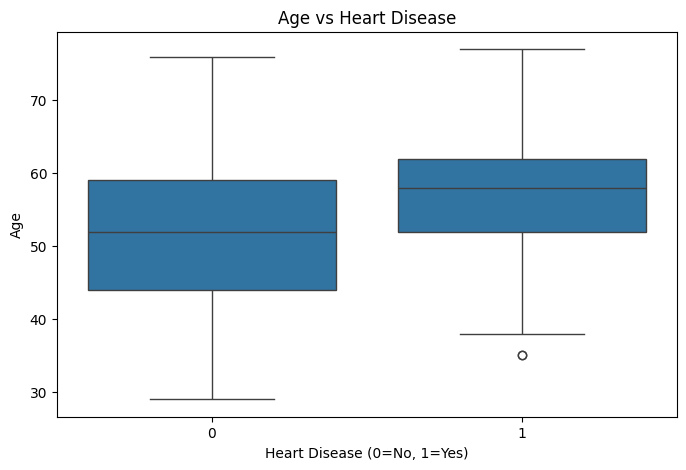

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x=target, y="Age", data=data)
plt.title("Age vs Heart Disease")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Age")
plt.show()

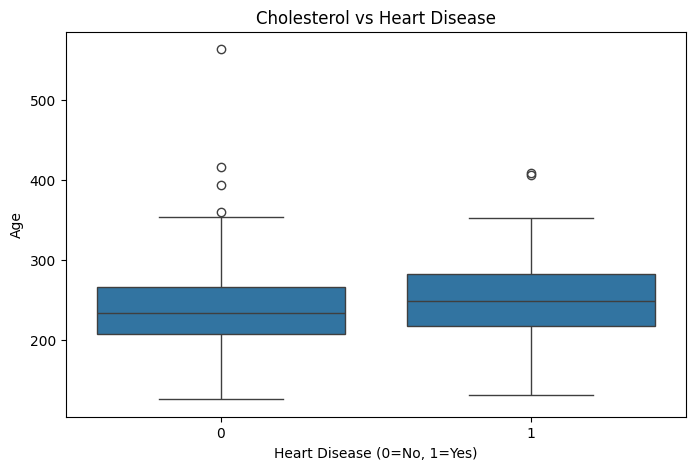

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x=target, y="cholesteral", data=data)
plt.title("Cholesterol vs Heart Disease")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Age")
plt.show()

In [31]:
#Correlation Analysis

correlation_matrix=data[num_cols].corr()
correlation_matrix

,Age,Trestbps,cholesteral,max heart rate,oldpeak
Age,1.000000,0.279351,0.213678,-0.398522,0.210013
Trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
cholesteral,0.213678,0.123174,1.000000,-0.009940,0.053952
max heart rate,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


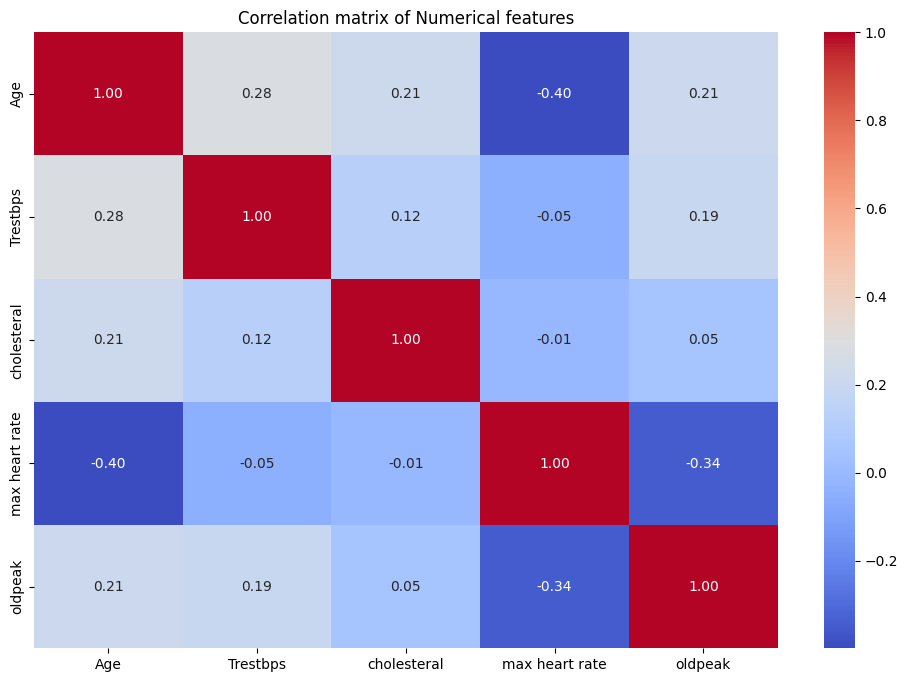

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix of Numerical features")
plt.show()

In [33]:
target_corr=data.corr()[target].sort_values(ascending=False)
target_corr

Is healthy                       1.000000
chest pain type_asympt           0.516015
Thal_ rev                        0.486112
exercise induced angina          0.436757
oldpeak                          0.430696
slope_flat                       0.362053
Number of vessels colored_2.0    0.273998
Number of vessels colored_1.0    0.232412
Age                              0.225439
Number of vessels colored_3.0    0.210615
resting ecg_ hyp                 0.159775
Trestbps                         0.144931
Thal_ fix                        0.106589
cholesteral                      0.085239
slope_down                       0.063554
fasting blood sugar< 120        -0.028046
chest pain type_angina          -0.086957
resting ecg_norm                -0.175322
Sex                             -0.280937
chest pain type_notang          -0.316742
max heart rate                  -0.421741
Number of vessels colored_0.0   -0.465590
Thal_norm                       -0.527334
Name: Is healthy, dtype: float64

In [34]:
#Grouping data for medical significance

data.groupby(target)[num_cols].mean()

,Age,Trestbps,cholesteral,max heart rate,oldpeak
Is healthy,,,,,
0,52.496970,129.303030,242.230303,158.466667,0.583030
1,56.601449,134.398551,251.086957,139.101449,1.585507


In [35]:
data.groupby(target)[num_cols].median()

,Age,Trestbps,cholesteral,max heart rate,oldpeak
Is healthy,,,,,
0,52.0,130.0,234.0,161.0,0.2
1,58.0,130.0,249.0,142.0,1.4


### Modelling and evaluation

In [37]:
#Separating data in X and y

X=data.drop(target, axis=1)
y=data[target]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [39]:
X_train

,Age,Sex,Trestbps,cholesteral,fasting blood sugar< 120,max heart rate,exercise induced angina,oldpeak,resting ecg_ hyp,resting ecg_norm,...,Thal_ fix,Thal_ rev,Thal_norm,Number of vessels colored_0.0,Number of vessels colored_1.0,Number of vessels colored_2.0,Number of vessels colored_3.0,chest pain type_angina,chest pain type_asympt,chest pain type_notang
51,50.0,0,140.0,233.0,1,163.0,0,0.6,False,True,...,False,True,False,False,True,False,False,False,False,True
212,41.0,1,126.0,306.0,1,163.0,0,0.0,False,True,...,False,False,True,True,False,False,False,False,False,False
175,57.0,0,150.0,126.0,0,173.0,0,0.2,False,True,...,False,True,False,False,True,False,False,False,False,True
114,43.0,1,122.0,213.0,1,165.0,0,0.2,False,True,...,False,False,True,True,False,False,False,False,False,True
178,45.0,0,142.0,309.0,1,147.0,1,0.0,True,False,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,57.0,0,110.0,335.0,1,143.0,1,3.0,False,True,...,False,True,False,False,True,False,False,False,True,False
214,61.0,0,134.0,234.0,1,145.0,0,2.6,False,True,...,False,False,True,False,False,True,False,True,False,False
136,51.0,0,140.0,299.0,1,173.0,1,1.6,False,True,...,False,True,False,True,False,False,False,False,True,False
137,58.0,0,125.0,300.0,1,171.0,0,0.0,True,False,...,False,True,False,False,False,True,False,False,True,False


In [40]:
#Imports

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve,PrecisionRecallDisplay,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [41]:
# Multi- modelling using pipeline

models={
    "Logistic Regression":Pipeline([
        ("scaler",StandardScaler()),
        ("model",LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "Decision Tree":DecisionTreeClassifier(
        max_depth=5,
        random_state=42
    ),
    "Random forest":RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ),
    "KNN":Pipeline([
        ("scaler",StandardScaler()),
        ("model",KNeighborsClassifier(n_neighbors=7))
    ]),
    "SVM":Pipeline([
        ("scaler",StandardScaler()),
        ("model",SVC(kernel='rbf',probability=True, random_state=42))
    ])
}
        

In [42]:
#Results

results=[]

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    results.append({
    "Model":name,
    "Accuracy":accuracy_score(y_test,y_pred),
    "Precision":precision_score(y_test, y_pred),
    "Recall":recall_score(y_test, y_pred),
    "F1_score":f1_score(y_test, y_pred)
    })

    print(f"\n{name}")
    print("Confusion matrix")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification report")
    print(classification_report(y_test, y_pred))



Logistic Regression
Confusion matrix
[[29  4]
 [ 6 22]]

Classification report
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.85      0.79      0.81        28

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61


Decision Tree
Confusion matrix
[[24  9]
 [ 8 20]]

Classification report
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        33
           1       0.69      0.71      0.70        28

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61


Random forest
Confusion matrix
[[27  6]
 [ 7 21]]

Classification report
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
         

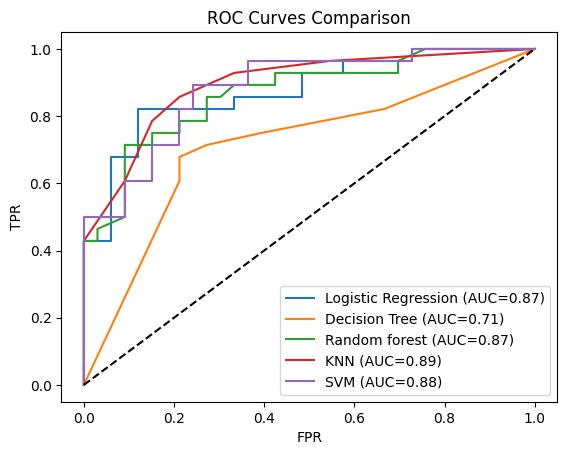

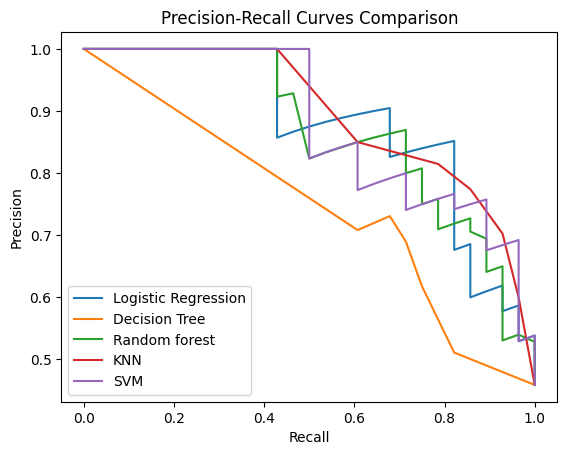

In [43]:
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    # ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # PR
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()

plt.figure()
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=name)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves Comparison")
plt.legend()
plt.show()
    

### Feature importance

In [45]:
log_reg=models["Logistic Regression"].named_steps["model"]

feature_importance_lr=pd.DataFrame({
    "Feature":X.columns,
    "Coefficient":log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

feature_importance_lr

,Feature,Coefficient
20,chest pain type_asympt,0.850124
17,Number of vessels colored_2.0,0.786799
11,slope_flat,0.777773
16,Number of vessels colored_1.0,0.724438
2,Trestbps,0.631159
7,oldpeak,0.582238
18,Number of vessels colored_3.0,0.484902
13,Thal_ rev,0.330855
6,exercise induced angina,0.320741
4,fasting blood sugar< 120,0.264118


In [46]:
rf_model=models["Random forest"]

feature_importance_rf=pd.DataFrame({
    "Feature":X.columns,
    "Importance":rf_model.feature_importances_}).sort_values(by="Importance", ascending=False)

feature_importance_rf

,Feature,Importance
20,chest pain type_asympt,0.108659
7,oldpeak,0.100288
5,max heart rate,0.089693
0,Age,0.089356
15,Number of vessels colored_0.0,0.081123
14,Thal_norm,0.075057
2,Trestbps,0.074025
13,Thal_ rev,0.071255
3,cholesteral,0.068691
6,exercise induced angina,0.053386
